In [4]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv('../data/EPL 19-20 player statistics.csv')
# df = pd.read_csv('../data/player_game_statistic_10_2019.csv')
pd.set_option('display.max_columns', None)

In [47]:
df1['team'].value_counts()

NameError: name 'df1' is not defined

In [48]:
# df = pd.concat([df, df1], axis=0)

In [79]:
# Filter for Forwards who have played at least 500 minutes
mask = (df.position == 'Forward') & ((df.mins_played > 500))
fwd_df = df.loc[mask]

In [80]:
# create a new column in the data to get metric per 90 minutes
fwd_df['nineties'] = fwd_df['mins_played'] / 90
fwd_df.head()

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [84]:
fwd_df['pass_completion_%'] = fwd_df['accurate_pass'] / fwd_df['total_pass']
fwd_df['shots'] = fwd_df['attempts_ibox']+fwd_df['attempts_obox']

In [85]:
fwd_df.head()

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [86]:
# Remove non-numerical data
all_columns = list(fwd_df.columns)
unwanted_columns = {'player_id', 'mins_played', 'position', 'player', 'team', 'foot', 'age', 'team_id', 'nineties', 'pass_completion_%'}
index_columns = [ele for ele in all_columns if ele not in unwanted_columns]

In [87]:
dfP90 = fwd_df.loc[:,index_columns].div(fwd_df['nineties'], axis=0)

In [88]:
# P90 Dataframe
master_df = pd.concat([fwd_df[['player_id', 'position', 'player', 'team', 'foot', 'age', 'team_id', 'pass_completion_%']], dfP90], axis = 1)
master_df.head(5)

,player_id,position,player,team,foot,age,team_id,pass_completion_%,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,

In [89]:
# Drop columns for normalization process
fwd_df1 = fwd_df.drop(['player_id','position','player','team','foot','age','team_id','pass_completion_%'], axis=1)

In [90]:
# Normalize data
DFNom = fwd_df1.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [91]:
master_df = pd.concat([master_df[['player']], DFNom], axis = 1)
master_df.head()

,player,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,

In [92]:
# P90 Dataframe
last_df = pd.concat([master_df, fwd_df[['pass_completion_%']]], axis = 1)
last_df.head(5)

,player,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,

In [62]:
len(master_df.columns)

11

In [65]:
def createRadar(player, player2):

    # Filter df 
    playerdf = master_df[master_df['player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return
    
    playerdf2 = master_df[master_df['player']==player2]
    
    if playerdf2.empty == True:
        print('DF Empty')
        return
    
    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    values += values [:1]
    
    attributes2 = list(playerdf2)[1:]
    values2 = playerdf2.iloc[0,1:].tolist()
    values2 += values2 [:1]
  
    angles = [n / 10 * 2 * pi for n in range(10)]
    angles += angles [:1]
    
    angles2 = [n / 10 * 2 * pi for n in range(10)]
    angles2 += angles2 [:1]
    
    # Add Plot
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(8,8))
    plt.rcParams["font.family"] = "Gill Sans"
    
    plt.xticks(angles[:-1],attributes, )
    
    ax.plot(angles,values, '#1D428A', linewidth=2, alpha=0.7,zorder=10)
    ax.fill(angles,values, '#1D428A', alpha=0.4)
    
    ax.plot(angles2,values2, '#FFCD00', linewidth=2, alpha=0.7,zorder=10)
    ax.fill(angles2, values2, '#FFCD00', alpha=0.4)
    
    
    # Add rotated Labels
    sections = len(attributes)
    section_width = np.deg2rad(360/sections)
    values = master_df.iloc[0,1:].tolist()

    for i in range (0,sections):
        x = (section_width*i)
        y = 1.05

        rot = np.rad2deg(x)-90

        ax.text(x, y, attributes[i], alpha=1, ha="center", va="center", rotation=rot)
    
    #Set position of y-labels (0-100) to be in the middle of the first two axes.
    ax.set_rlabel_position(90)
    
    ax.grid(color='lightgrey',zorder=0,alpha=0.4)
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('white')
    
    # Make the y-axis (0-1) labels smaller.
    ax.tick_params(axis='y', labelsize=10)
    yt = [20,40,60,80,100]
    ax.set_yticklabels(yt)
    
    labels = [item.get_text() for item in ax.get_xticklabels()]

    empty_string_labels = ['']*len(labels)
    ax.set_xticklabels(empty_string_labels)
    
    # Ensure radar goes from 0 to 100.
    ax.set_ylim(0, 1)

    
    circle = plt.Circle((0, 0), 0.9, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=48, zorder=0,alpha=0.3)
    circle1 = plt.Circle((0, 0), 0.5, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=48, zorder=0, alpha=0.3)
    circle2 = plt.Circle((0, 0), 0.1, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=48, zorder=0, alpha=0.3)
    plt.gca().add_artist(circle)
    plt.gca().add_artist(circle1)
    plt.gca().add_artist(circle2)
    
    plt.savefig("watkins_radar", dip=500, bbox_inches='tight',transparent=True)
    plt.tight_layout()

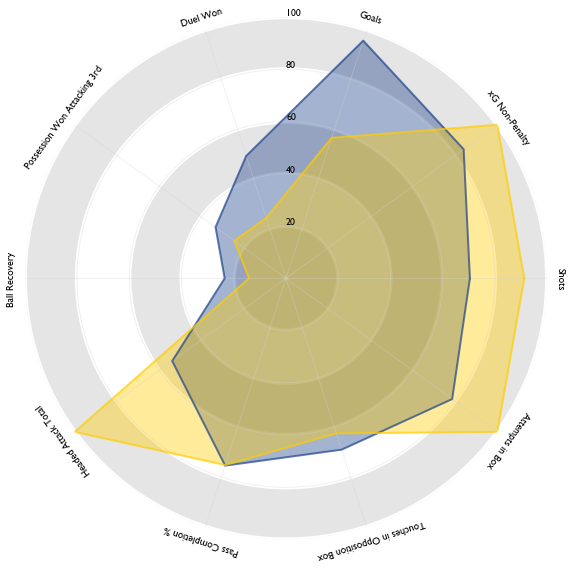

In [66]:
createRadar('Ollie Watkins','Patrick Bamford')

In [93]:
def createBar(player):
    # Filter df 
    playerdf = master_df[master_df['player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return

    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    
    y_pos = np.arange(len(values))
    
    fig, ax = plt.subplots(figsize=(9,9))
    
    csfont = {'fontname':'Gill Sans'}
    hfont = {'fontname':'Gill Sans'}
    
        
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
   
    #Assign bars to a variable when plotting them
    bars = ax.barh(y_pos,values, linewidth=2, alpha=0.8, color='#1D428A')
    
    #Iterate through each bar, and get the number of the iteration to get the correct average from the main df
    for idx, bar in enumerate(bars):

        #Get the location of the bottom left of the bar
        y0 = bar.xy[1]
        
        #Calcuate the top left by adding the height
        y1 = y0+bar.get_height()
        
        #Plot a vertical line for the average, at the y paramaters calculated above
        plt.vlines(master_df.mean()[idx],y0,y1, color='#FFCD00')
    
    ax.text(0.02,9,"0.58" ,fontsize=20,color='white')
    ax.text(0.02,8,"0.5" ,fontsize=20,color='white')
    ax.text(0.02,7,"2.61" ,fontsize=20,color='white')
    ax.text(0.02,6,"2.34" ,fontsize=20,color='white')
    ax.text(0.02,5,"5.8" ,fontsize=20,color='white')
    ax.text(0.02,4,"75%" ,fontsize=20,color='white')
    ax.text(0.02,3,"0.55" ,fontsize=20,color='white')
    ax.text(0.02,2,"2.27" ,fontsize=20,color='white')
    ax.text(0.02,1,"0.46" ,fontsize=20,color='white')
    ax.text(0.02,0,"4.94" ,fontsize=20,color='white')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(attributes,**csfont, fontsize=20)
    
#     ax.set_title(player, fontsize=30,**csfont, fontweight='bold')
    ax.get_xaxis().set_ticks([])
    
    plt.savefig("wat_Rad", dip=500, bbox_inches='tight',transparent=True)
    plt.show()

In [94]:
master_df = last_df[['player','duel_won','poss_won_att_3rd','ball_recovery',
                      'att_hd_total','pass_completion_%','touches_in_opp_box','attempts_ibox','shots','expected_goals_nonpenalty','goals',]]

In [95]:
master_df.rename(columns={
    'shots':'Shots',
    'goals':'Goals',
    'expected_goals_nonpenalty':'xG Non-Penalty',
    'touches_in_opp_box':'Touches in Opposition Box',
    'attempts_ibox':'Attempts in Box',
    'att_hd_total':'Headed Attack Total',
    'pass_completion_%':'Pass Completion %',
    'duel_won':'Duel Won',
    'poss_won_att_3rd':'Possession Won Attacking 3rd',
    'ball_recovery':'Ball Recovery'
}, inplace=True)

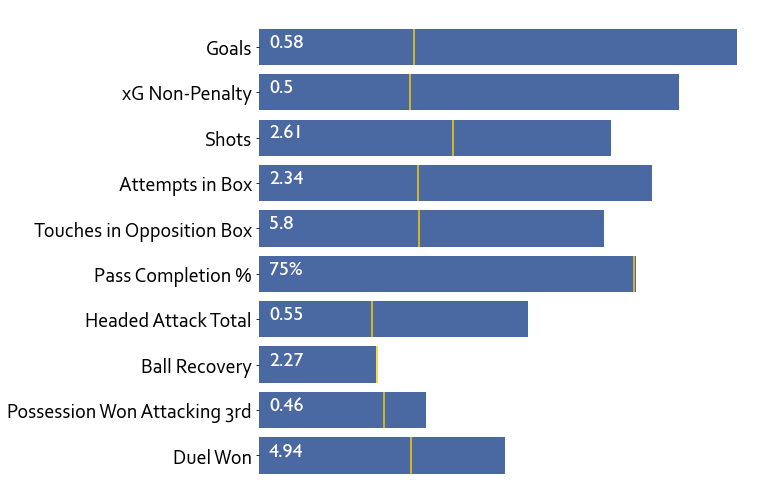

In [75]:
createBar('Ollie Watkins')

In [98]:
def createBar(player):
    # Filter df 
    playerdf = master_df[master_df['player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return

    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    
    y_pos = np.arange(len(values))
    
    fig, ax = plt.subplots(figsize=(9,9))
    
    csfont = {'fontname':'Corbel'}
    hfont = {'fontname':'Corbel'}
    
        
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
   
    #Assign bars to a variable when plotting them
    bars = ax.barh(y_pos,values, linewidth=2, alpha=0.8, color='#1D428A')
    
    #Iterate through each bar, and get the number of the iteration to get the correct average from the main df
    for idx, bar in enumerate(bars):

        #Get the location of the bottom left of the bar
        y0 = bar.xy[1]
        
        #Calcuate the top left by adding the height
        y1 = y0+bar.get_height()
        
        #Plot a vertical line for the average, at the y paramaters calculated above
        plt.vlines(master_df.mean()[idx],y0,y1, color='#FFCD00')
    
    ax.text(0.02,9,"0.67" ,fontsize=20,color='white')
    ax.text(0.02,8,"0.51" ,fontsize=20,color='white')
    ax.text(0.02,7,"3.05" ,fontsize=20,color='white')
    ax.text(0.02,6,"2.51" ,fontsize=20,color='white')
    ax.text(0.02,5,"5.47" ,fontsize=20,color='white')
    ax.text(0.02,4,"58%" ,fontsize=20,color='white')
    ax.text(0.02,3,"0.4" ,fontsize=20,color='white')
    ax.text(0.02,2,"4.13" ,fontsize=20,color='white')
    ax.text(0.02,1,"1.17" ,fontsize=20,color='white')
    ax.text(0.02,0,"4.94" ,fontsize=20,color='white')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(attributes,**csfont, fontsize=20)
    
#     ax.set_title(player, fontsize=30,**csfont, fontweight='bold')
    ax.get_xaxis().set_ticks([])
    
    plt.savefig("ings_Rad", dip=500, bbox_inches='tight',transparent=True)
    plt.show()

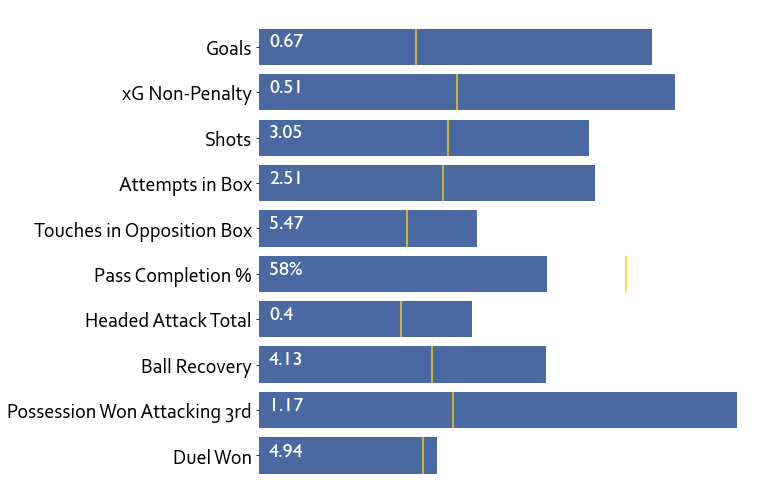

In [99]:
createBar('Danny Ings')